# Explorative Datenanalyse

In [1]:
%pip install docutils==0.17.1
%pip install numpy
%pip install pandas
%pip install pyarrow
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

   ---------------------------------------- 0.0/575.5 kB ? eta -:--:--
    --------------------------------------- 10.2/575.5 kB ? eta -:--:--
    --------------------------------------- 10.2/575.5 kB ? eta -:--:--
   -- ------------------------------------ 41.0/575.5 kB 326.8 kB/s eta 0:00:02
   ------------ --------------------------- 174.1/575.5 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 450.6/575.5 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 575.5/575.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
import pandas as pd
from IPython.display import display

# Import Data

In [5]:
products_source = pd.read_csv('data/products.csv')
stores_source   = pd.read_csv('data/stores.csv')

In [6]:
transaction_lines_test_source   = pd.read_parquet('data/transaction_lines_test_1.parquet')
transaction_lines_train_source  = pd.read_parquet('data/transaction_lines_train_1.parquet')
transactions_test_source        = pd.read_parquet('data/transactions_test_1.parquet')
transactions_train_source       = pd.read_parquet('data/transactions_train_1.parquet')

# Inhalt der einzelnen Dateien 

In [7]:
# CSV-Dateien
print("📦 products.csv")
print(products_source.head(), '\n')

print("🏬 stores.csv")
print(stores_source.head(), '\n')

# Parquet-Dateien: transaction_lines und transactions
print("🧾 transaction_lines_test_1.parquet")
print(transaction_lines_test_source.head(), '\n')

print("🧾 transaction_lines_train_1.parquet")
print(transaction_lines_train_source.head(), '\n')

print("💳 transactions_test_1.parquet")
print(transactions_test_source.head(), '\n')

print("💳 transactions_train_1.parquet")
print(transactions_train_source.head(), '\n')

📦 products.csv
                                     id                       base_product_id  \
0  fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2  fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2   
1  608a870f-f898-486c-b66d-8979855c1cbb  608a870f-f898-486c-b66d-8979855c1cbb   
2  3758a745-6170-4650-ad9d-0f8b6c6b781d  3758a745-6170-4650-ad9d-0f8b6c6b781d   
3  d5579e9a-8fd4-4ca5-a902-88348d8e0130  d5579e9a-8fd4-4ca5-a902-88348d8e0130   
4  ad191c01-3a19-4ae9-b7a0-1f8fdf227414  ad191c01-3a19-4ae9-b7a0-1f8fdf227414   

                   category  price  popularity  valid_from    valid_to  \
0               CONVENIENCE   2.49    0.121549  2024-10-29  2025-01-06   
1         FRUITS_VEGETABLES  12.79    0.015492  2013-12-27  2014-07-16   
2           LONG_SHELF_LIFE   1.79    0.139815  2023-02-11  2023-05-09   
3  FRUITS_VEGETABLES_PIECES   1.49    0.148460  2023-09-03  2023-09-24   
4              FROZEN_GOODS   2.49    0.121549  2011-05-05  2013-08-27   

   sold_by_weight    weight  age_restricted  
0      

# Datenbereinigung und Vorbereitung für Feature Engineering


Ich werde eine Datenbereinigung für die Tabellen products_source und transaction_lines_test_source durchführen und anschließend einen zusammengeführten Datensatz erstellen, der für das Feature Engineering verwendet werden kann.

# Schritt 1: Erste Dateninspektion

Zuerst inspizieren wir beide Tabellen, um ihre Struktur zu verstehen und potenzielle Bereinigungsbedarfe zu identifizieren.

In [8]:
# Daten laden
products_source = pd.read_csv('data/products.csv')
transaction_lines_test_source = pd.read_parquet('data/transaction_lines_test_1.parquet')

# Grundlegende Informationen anzeigen
print("Produkttabellen-Info:")
print(products_source.info())
print("\nTransaktionszeilen Test-Tabellen-Info:")
print(transaction_lines_test_source.info())

# Beispieldaten anzeigen
print("\nProduktbeispiel:")
print(products_source.head())
print("\nTransaktionszeilen Test-Beispiel:")
print(transaction_lines_test_source.head())

Produkttabellen-Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8120 non-null   object 
 1   base_product_id  8120 non-null   object 
 2   category         8120 non-null   object 
 3   price            8120 non-null   float64
 4   popularity       8120 non-null   float64
 5   valid_from       8120 non-null   object 
 6   valid_to         6330 non-null   object 
 7   sold_by_weight   8120 non-null   bool   
 8   weight           5615 non-null   float64
 9   age_restricted   8120 non-null   bool   
dtypes: bool(2), float64(3), object(5)
memory usage: 523.5+ KB
None

Transaktionszeilen Test-Tabellen-Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647089 entries, 0 to 8647088
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id    

# Schritt 2: Datenbereinigung für Produkttabelle

Beginnen wir mit der Bereinigung der Produkttabelle:



In [9]:
# Kopie erstellen, um Originaldaten zu erhalten
products_clean = products_source.copy()

# 1. Fehlende Werte prüfen
print("Fehlende Werte in Produkten:")
print(products_clean.isna().sum())

# 2. Fehlende Gewichtswerte behandeln (nur für nach Gewicht verkaufte Produkte)
products_clean.loc[(products_clean['sold_by_weight']) & 
                  (products_clean['weight'].isna()), 'weight'] = products_clean['weight'].median()

# 3. Datumsspalten in datetime umwandeln
products_clean['valid_from'] = pd.to_datetime(products_clean['valid_from'])
products_clean['valid_to'] = pd.to_datetime(products_clean['valid_to'])

# 4. Konsistenz zwischen id und base_product_id prüfen
# Hinweis: Diese sollten für Basisprodukte gleich sein, für Varianten unterschiedlich
products_clean['is_base_product'] = products_clean['id'] == products_clean['base_product_id']

# 5. Boolesche Spalten in den richtigen Datentyp umwandeln
products_clean['sold_by_weight'] = products_clean['sold_by_weight'].astype(bool)
products_clean['age_restricted'] = products_clean['age_restricted'].astype(bool)

# 6. Preis- und Popularitätsbereiche prüfen
print("\nPreisstatistiken:", products_clean['price'].describe())
print("Popularitätsstatistiken:", products_clean['popularity'].describe())

# 7. Kategorienamen bereinigen (Sonderzeichen entfernen falls vorhanden)
products_clean['category'] = products_clean['category'].str.strip().str.upper()

# Bereinigte Produkte anzeigen
print("\nBereinigte Produkte:")
print(products_clean.head())

Fehlende Werte in Produkten:
id                    0
base_product_id       0
category              0
price                 0
popularity            0
valid_from            0
valid_to           1790
sold_by_weight        0
weight             2505
age_restricted        0
dtype: int64

Preisstatistiken: count    8120.000000
mean        6.705783
std        19.499932
min         0.190000
25%         1.790000
50%         3.390000
75%         8.490000
max       589.490000
Name: price, dtype: float64
Popularitätsstatistiken: count    8.120000e+03
mean     9.211875e-02
std      5.608844e-02
min      1.254813e-52
25%      3.660985e-02
50%      1.015262e-01
75%      1.398146e-01
max      1.925426e-01
Name: popularity, dtype: float64

Bereinigte Produkte:
                                     id                       base_product_id  \
0  fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2  fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2   
1  608a870f-f898-486c-b66d-8979855c1cbb  608a870f-f898-486c-b66d-8979855c1cbb   
2  3

Hängen fehlende 'valid_to'-Werte mit Datum des 'valid_from' zusammen?

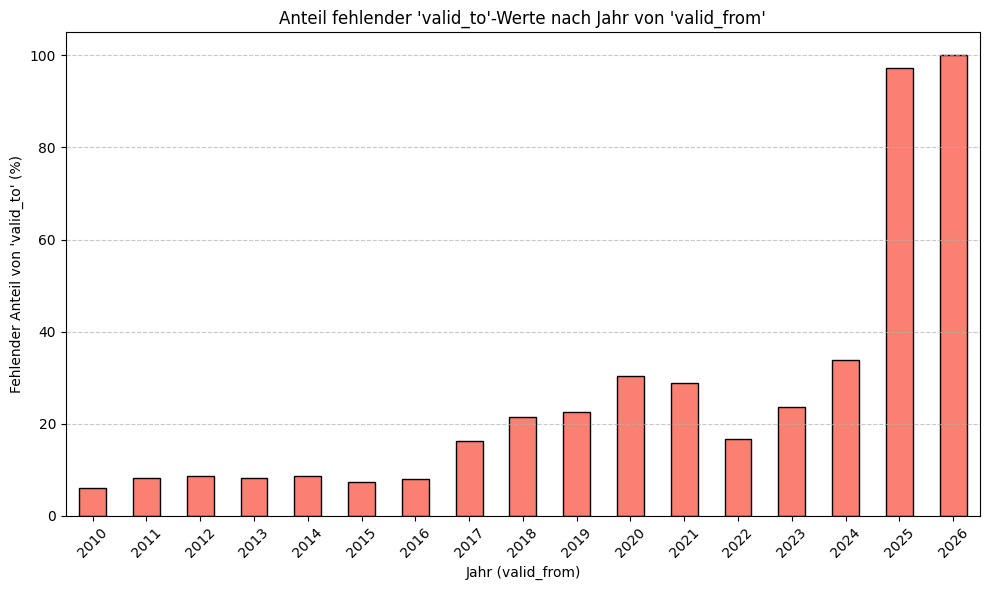

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Jahr extrahieren aus 'valid_from'
products_clean['valid_from_year'] = pd.to_datetime(products_clean['valid_from']).dt.year

# Maske: Fehlt 'valid_to'?
products_clean['valid_to_missing'] = products_clean['valid_to'].isna()

# Gruppierung nach Jahr: Anteil fehlender 'valid_to'
missing_by_year = products_clean.groupby('valid_from_year')['valid_to_missing'].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
missing_by_year.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Anteil fehlender 'valid_to'-Werte nach Jahr von 'valid_from'")
plt.xlabel("Jahr (valid_from)")
plt.ylabel("Fehlender Anteil von 'valid_to' (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Erklärung zur Produktbereinigung:
Fehlende Werte: Wir haben auf fehlende Werte geprüft, besonders in der Gewichtsspalte für nach Gewicht verkaufte Produkte.

Datumsumwandlung: Datumsspalten wurden in das richtige Format konvertiert.

Basisprodukt-Kennzeichnung: Eine Spalte hinzugefügt, um Basisprodukte von Varianten zu unterscheiden.    ( 'is_base_product',       # Neu: Kennzeichnet Basisprodukte )


Typkonvertierung: Sichergestellt, dass boolesche Spalten den richtigen Datentyp haben.

Datenvalidierung: Numerische Bereiche für Preis und Popularität geprüft.

Kategoriebereinigung: Kategorienamen standardisiert.

# Schritt 3: Datenbereinigung für Transaktionszeilen-Testtabelle


Jetzt bereinigen wir die Transaktionszeilen-Testtabelle:

In [10]:
# Kopie erstellen, um Originaldaten zu erhalten
transaction_lines_clean = transaction_lines_test_source.copy()

# 1. Fehlende Werte prüfen
print("Fehlende Werte in Transaktionszeilen:")
print(transaction_lines_clean.isna().sum())

# 2. Zeitstempel in datetime umwandeln
transaction_lines_clean['timestamp'] = pd.to_datetime(transaction_lines_clean['timestamp'])

# 3. Auf negative Preise oder Stückzahlen prüfen
print("\nNegative Verkaufspreise:", (transaction_lines_clean['sales_price'] < 0).sum())
print("Negative Stückzahlen/Gewichte:", (transaction_lines_clean['pieces_or_weight'] < 0).sum())

# 4. Stornierte Transaktionen behandeln (können zur Analyse behalten werden, aber kennzeichnen)
transaction_lines_clean['was_voided'] = transaction_lines_clean['was_voided'].astype(bool)

# 5. Kamera-Sicherheitsbereich prüfen (sollte 0-1 sein)
print("\nKamera-Sicherheitsbereich:", 
      transaction_lines_clean['camera_certainty'].min(), 
      transaction_lines_clean['camera_certainty'].max())

# 6. Boolesche Spalten in den richtigen Datentyp umwandeln
transaction_lines_clean['camera_product_similar'] = transaction_lines_clean['camera_product_similar'].astype(bool)

# Bereinigte Transaktionszeilen anzeigen
print("\nBereinigte Transaktionszeilen:")
print(transaction_lines_clean.head())

Fehlende Werte in Transaktionszeilen:
id                            0
transaction_id                0
product_id                   63
timestamp                     0
pieces_or_weight              0
sales_price                   0
was_voided                    0
camera_product_similar    21141
camera_certainty          21141
dtype: int64

Negative Verkaufspreise: 0
Negative Stückzahlen/Gewichte: 0

Kamera-Sicherheitsbereich: 0.007408546132557715 1.0

Bereinigte Transaktionszeilen:
   id                        transaction_id  \
0  19  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
1  20  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
2  21  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
3  22  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
4  23  103a0875-8a44-42e7-8c69-3c927ba6d1b0   

                             product_id                  timestamp  \
0  ed7f76d7-3aab-456d-ae5d-a7d6c9bfd8f7 2024-03-16 08:13:00.698354   
1  88f0ce90-e55f-49d1-80b2-04e9c9454830 2024-03-16 08:13:05.449080   
2  9b9ef00d-a041-4ef1-

Erklärung zur Transaktionszeilen-Bereinigung:
Fehlende Werte: Identifizierung fehlender Daten, die behandelt werden müssen.

Zeitstempel-Konvertierung: Sicherstellung des richtigen Formats für zeitbasierte Analysen.

Datenvalidierung: Prüfung auf negative Werte in Preisen und Mengen.

Stornierte Transaktionen: Korrekte Typisierung der booleschen Spalte.

Kamera-Daten: Überprüfung, ob die Kamera-Sicherheitswerte im erwarteten Bereich liegen.

Typkonvertierung: Sicherstellung, dass boolesche Spalten den richtigen Datentyp haben.

# Schritt 4: Tabellen zusammenführen


Jetzt führen wir die bereinigten Tabellen zusammen:



In [11]:
# Zusammenführung durchführen
merged_data = pd.merge(
    transaction_lines_clean,
    products_clean,
    left_on='product_id',
    right_on='id',
    how='left',
    suffixes=('_transaction', '_product')
)

# Ergebnis prüfen
print("Zusammengeführte Daten Form:", merged_data.shape)
print("\nZusammengeführte Daten Spalten:", merged_data.columns.tolist())
print("\nZusammengeführte Daten Beispiel:")
print(merged_data.head())

Zusammengeführte Daten Form: (8647089, 20)

Zusammengeführte Daten Spalten: ['id_transaction', 'transaction_id', 'product_id', 'timestamp', 'pieces_or_weight', 'sales_price', 'was_voided', 'camera_product_similar', 'camera_certainty', 'id_product', 'base_product_id', 'category', 'price', 'popularity', 'valid_from', 'valid_to', 'sold_by_weight', 'weight', 'age_restricted', 'is_base_product']

Zusammengeführte Daten Beispiel:
   id_transaction                        transaction_id  \
0              19  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
1              20  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
2              21  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
3              22  103a0875-8a44-42e7-8c69-3c927ba6d1b0   
4              23  103a0875-8a44-42e7-8c69-3c927ba6d1b0   

                             product_id                  timestamp  \
0  ed7f76d7-3aab-456d-ae5d-a7d6c9bfd8f7 2024-03-16 08:13:00.698354   
1  88f0ce90-e55f-49d1-80b2-04e9c9454830 2024-03-16 08:13:05.449080   
2  9b9e

# Schritt 5: Nachbereitung und Feature-Vorbereitung


Nach der Zusammenführung führen wir zusätzliche Bereinigungen durch:



In [12]:
# 1. Fehlende Produktinformationen prüfen
missing_products = merged_data['id_product'].isna()
print(f"Transaktionen mit fehlenden Produktinfos: {missing_products.sum()}")

# Option 1: Transaktionen mit fehlenden Produktinfos entfernen
# merged_data = merged_data[~missing_products].copy()

# Option 2: Kennzeichnen und behalten (wir wählen diese Option)
merged_data['missing_product_info'] = missing_products

# 2. Abgeleitete Features berechnen
# Preis pro Einheit (für nach Gewicht verkaufte Produkte)
merged_data['price_per_unit'] = merged_data['sales_price'] / merged_data['pieces_or_weight']

# Rabattberechnung (wenn Verkaufspreis niedriger als erwartet)
merged_data['expected_price'] = merged_data['pieces_or_weight'] * merged_data['price']
merged_data['discount_amount'] = merged_data['expected_price'] - merged_data['sales_price']
merged_data['has_discount'] = merged_data['discount_amount'] > 0

# Zeitbasierte Features (aus Zeitstempel extrahieren)
merged_data['hour_of_day'] = merged_data['timestamp'].dt.hour
merged_data['day_of_week'] = merged_data['timestamp'].dt.dayofweek
merged_data['is_weekend'] = merged_data['day_of_week'].isin([5, 6])

# 3. Unnötige Spalten entfernen
columns_to_drop = [
    'id_transaction',  # Nur eine Zeilennummer
    'id_product',      # Identisch mit product_id
    'base_product_id'  # Wir haben is_base_product Flag
]
merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# 4. Finale Prüfung
print("\nFinale zusammengeführte Daten Info:")
print(merged_data.info())
print("\nBeispiel der finalen Daten:")
print(merged_data.head())

Transaktionen mit fehlenden Produktinfos: 63

Finale zusammengeführte Daten Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647089 entries, 0 to 8647088
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   transaction_id          object        
 1   product_id              object        
 2   timestamp               datetime64[us]
 3   pieces_or_weight        float64       
 4   sales_price             float64       
 5   was_voided              bool          
 6   camera_product_similar  bool          
 7   camera_certainty        float64       
 8   category                object        
 9   price                   float64       
 10  popularity              float64       
 11  valid_from              datetime64[ns]
 12  valid_to                datetime64[ns]
 13  sold_by_weight          object        
 14  weight                  float64       
 15  age_restricted          object        
 16  is_base_

Erklärung zur Nachbereitung:
Fehlende Produkte: Wir haben Transaktionen mit fehlenden Produktinformationen identifiziert und gekennzeichnet.

Abgeleitete Features:

Preis pro Einheit für gewichtsbasierte Produkte berechnet

Rabattinformationen ermittelt

Zeitbasierte Features aus den Zeitstempeln extrahiert

Spaltenbereinigung: Überflüssige Spalten entfernt, um den Datensatz sauber zu halten.

Finale Prüfung: Überprüfung der Struktur des finalen Datensatzes.

# Schritt 6: Finalen Datensatz speichern


In [13]:
# Bereinigte und zusammengeführte Daten für Feature Engineering speichern
merged_data.to_parquet('data/cleaned_transactions_with_products_test.parquet')

print("Bereinigte und zusammengeführte Daten erfolgreich gespeichert.")

Bereinigte und zusammengeführte Daten erfolgreich gespeichert.


Finale Datensatzstruktur
Der resultierende Datensatz enthält folgende wichtige Spalten (unter anderem):

Transaktionsinformationen:

transaction_id: Transaktionskennung

product_id: Produktkennung

timestamp: Zeitpunkt des Scannens

pieces_or_weight: Menge oder Gewicht

sales_price: Tatsächlich gezahlter Preis

was_voided: Wurde der Artikel storniert?

camera_product_similar: Kameraerkennungsergebnis

camera_certainty: Sicherheit der Kameraerkennung

Produktinformationen:

category: Produktkategorie

price: Standardpreis

popularity: Produktpopularitäts-Score

valid_from/to: Gültigkeitsdatum des Produkts

sold_by_weight: Wird nach Gewicht verkauft?

weight: Standardgewicht (falls zutreffend)

age_restricted: Altersbeschränkungs-Flag

is_base_product: Handelt es sich um ein Basisprodukt?

Abgeleitete Features:

price_per_unit: Berechneter Preis pro Einheit/Gewicht

expected_price: Erwarteter Preis basierend auf Standardpreis

discount_amount: Rabattbetrag

has_discount: Flag für rabattierte Artikel

hour_of_day, day_of_week, is_weekend: Zeitfeatures

missing_product_info: Flag für fehlende Produktdaten

Dieser bereinigte und zusammengeführte Datensatz ist nun bereit für das Feature Engineering, wo Sie zusätzliche Features basierend auf diesen Grundspalten erstellen können.

# Änderungsprotokoll der Datenbereinigung


In [14]:
# 1. Zusätzliche Spalten (NEU)
new_columns = [
    'is_base_product',       # Neu: Kennzeichnet Basisprodukte
    'missing_product_info',  # Neu: Flag für fehlende Produktdaten
    'price_per_unit',        # Neu: Berechneter Einzelpreis
    'expected_price',        # Neu: Erwarteter Standardpreis
    'discount_amount',      # Neu: Rabatthöhe
    'has_discount',         # Neu: Rabatt-Ja/Nein
    'hour_of_day',          # Neu: Stunde des Kaufs
    'day_of_week',         # Neu: Wochentag (0=Montag)
    'is_weekend'           # Neu: Wochenend-Flag
]
print("HINZUGEFÜGTE SPALTEN:")
print(pd.DataFrame(new_columns, columns=['Neue Spalten']))

HINZUGEFÜGTE SPALTEN:
           Neue Spalten
0       is_base_product
1  missing_product_info
2        price_per_unit
3        expected_price
4       discount_amount
5          has_discount
6           hour_of_day
7           day_of_week
8            is_weekend


## Hinzugefügte Spalten und ihre Berechnung

### 1. is_base_product
`products_clean['is_base_product'] = products_clean['id'] == products_clean['base_product_id']`  
Identifiziert Basisprodukte (1) vs. Varianten (0). Wichtig für Preisdifferenzanalysen zwischen Produktversionen. Erleichtert die Segmentierung in Hauptprodukte und Derivate.

Warum hinzugefügt?
In unserem Produktkatalog gibt es Basisprodukte und Varianten (z.B. "T-Shirt Basic" als Basisprodukt und "T-Shirt Basic - XL" als Variante). Diese Spalte hilft uns zu erkennen:

1: Das Produkt ist ein Basisartikel (ID stimmt mit base_product_id überein)

0: Das Produkt ist eine Variante (ID unterscheidet sich)

Anwendungsbeispiele:

Analyse von Preisunterschieden zwischen Basisprodukten und Varianten

Identifikation, welche Varianten am häufigsten vorkommen

Vereinfachte Filterung für Produktmanagement

### 2. missing_product_info 
`merged_data['missing_product_info'] = merged_data['id_product'].isna()`  
Markiert Transaktionen mit fehlenden Produktdaten (1). Dient der Datenqualitätskontrolle und hilft bei der Identifikation von Integrationsproblemen im Joining-Prozess.

Warum hinzugefügt?
Nach dem Zusammenführen (Join) von Transaktionen und Produktdaten können einige Produktinformationen fehlen. Diese Spalte zeigt:

1: Zu dieser Transaktion fehlen Produktinformationen

0: Alle Produktdaten sind vorhanden

Wichtigkeit:

Datenqualitätskontrolle (wie viele Transaktionen sind betroffen?)

Entscheidungsgrundlage: Sollen fehlende Produktdaten nachgepflegt werden?

Kann als Filter für kritische Analysen verwendet werden



### 3. price_per_unit
`merged_data['price_per_unit'] = sales_price / pieces_or_weight`  
Berechnet den Einheitspreis für Mengenvergleiche. Ermöglicht faire Preisvergleiche zwischen unterschiedlichen Packungsgrößen. Besonders relevant für gewichtsbasierte Produkte.

Warum hinzugefügt?
Produkte werden unterschiedlich verkauft (stückweise oder nach Gewicht). Diese Spalte ermöglicht:

Faire Preisvergleiche zwischen verschiedenen Packungsgrößen

Erkennung von Sonderangeboten (ungewöhnlich niedriger Preis pro Einheit)

Vergleichbarkeit zwischen verschiedenen Produktkategorien

Beispiel:
Ein 500g Joghurt für 1,50€ und ein 750g Joghurt für 2,10€ lassen sich so direkt vergleichen (0,003€/g vs. 0,0028€/g)



### 4. expected_price
`merged_data['expected_price'] = pieces_or_weight * price`  
Berechnet den Soll-Preis ohne Rabatte. Dient als Basiswert für die Rabatterkennung. Zeigt Abweichungen vom Standardpreis an.

Warum hinzugefügt?
Diese Spalte zeigt, wie hoch der Preis ohne Rabatte sein sollte. Sie hilft uns:

Rabatte automatisch zu erkennen

Preisabweichungen vom Standard zu quantifizieren

Ungewöhnliche Preiseingaben zu identifizieren

Praxisbeispiel:
Ein Produkt mit Standardpreis 2,50€ wird in 3er-Pack verkauft:
Erwarteter Preis = 3 × 2,50€ = 7,50€



### 5. discount_amount  
`merged_data['discount_amount'] = expected_price - sales_price`  
Quantifiziert Rabattbeträge. Positive Werte zeigen tatsächliche Ersparnisse an. Wichtig für die Analyse von Promotion-Effektivität.

Warum hinzugefügt?
Diese Spalte macht Rabatte direkt sichtbar und messbar:

Positive Werte: Tatsächlicher Rabattbetrag (z.B. 2,00€ Ermäßigung)

Null: Kein Rabatt

Negative Werte: Wären Preisaufschläge (könnten auf Fehler hinweisen)

Anwendung:

Auswertung von Rabattkampagnen (wie viel wurde insgesamt reduziert?)

Kundensegmentierung nach Rabattnutzung

Erkennung von möglichen Kassensystem-Fehlern

### 6. has_discount
`merged_data['has_discount'] = discount_amount > 0`  
Binärer Indikator für Rabattaktivität (1=ja). Vereinfacht die Segmentierung rabattierter Transaktionen. Grundlage für Kampagnenanalysen.

Warum hinzugefügt?
Diese einfache Ja/Nein-Spalte ermöglicht:

Schnelle Filterung aller rabattierten Transaktionen

Berechnung von Rabattquoten (Anteil rabattierter Verkäufe)

Einfache visuelle Darstellungen von Rabattmustern

Vorteil:
Einfacher zu analysieren als der kontinuierliche discount_amount-Wert

### 7. hour_of_day
`merged_data['hour_of_day'] = timestamp.dt.hour`  
Extrahiert die Stunde der Transaktion (0-23). Ermöglicht Analyse von Tageszeitmustern. Wichtig für Personalplanung und Öffnungszeiten.

Warum hinzugefügt?
Die Verkaufsstunde beeinflusst das Kaufverhalten. Diese Spalte hilft:

Stoßzeiten im Tagesverlauf zu identifizieren

Personalplanung zu optimieren

Zeitliche Muster bei bestimmten Produkten zu erkennen

Beispielanalyse:
"Wann werden die meisten Energy-Drinks verkauft?" (Vermutlich morgens und nachmittags)

### 8. day_of_week  
`merged_data['day_of_week'] = timestamp.dt.dayofweek`  
Numerische Kodierung des Wochentags (0=Mo). Identifiziert wöchentliche Kaufzyklen. Hilfreich für Angebotssteuerung.

Warum hinzugefügt?
Das Einkaufsverhalten variiert stark nach Wochentag. Diese Spalte ermöglicht:

Erkennung von wöchentlichen Mustern

Planung von wochentagsabhängigen Aktionen

Vergleich von Werktagen vs. Wochenende

Typische Nutzung:
"An welchem Wochentag sollten wir den Weinverkauf bewerben?"



### 9. is_weekend
`merged_data['is_weekend'] = day_of_week.isin([5,6])`  
Kennzeichnet Wochenendtransaktionen (Sa/So). Unterscheidet Wochenend-/Wochentagsverhalten. Wichtig für differenzierte Verkaufsstrategien.

Warum hinzugefügt?
Wochenenden haben oft besondere Verkaufsmuster. Diese binäre Spalte:

Vereinfacht Wochenend-/Werktags-Vergleiche

Hilft bei der Planung von Wochenendaktionen

Ermöglicht spezifische Auswertungen für Samstag/Sonntag

Praxisbeispiel:
"Wie unterscheidet sich der Warenkorb am Wochenende von Werktagen?"

Zusammenfassung der Vorteile
Diese hinzugefügten Spalten ermöglichen:

Tiefere Einblicke in Preisstrukturen und Rabattierungen

Bessere Segmentierung von Produkten und Transaktionen

Zeitliche Analysen auf Tages- und Wochenebene

Datenqualitätskontrolle durch Fehlermarkierung

Vorbereitung für Machine Learning durch numerische Darstellung

Technischer Hinweis: Alle booleschen Spalten wurden als 1/0 kodiert, weil:

Machine-Learning-Algorithmen numerische Eingaben bevorzugen

Einheitliches Format für alle binären Features

Einfachere mathematische Operationen möglich

In [15]:
# 2. Gelöschte Spalten (ENTFERNT)
removed_columns = [
    'id_transaction',    # Entfernt: Doppelte Transaktions-ID
    'id_product',       # Entfernt: Doppelte Produkt-ID
    'base_product_id'   # Entfernt: Durch is_base_product ersetzt
]
print("\nENTFERNTE SPALTEN:")
print(pd.DataFrame(removed_columns, columns=['Gelöschte Spalten']))


ENTFERNTE SPALTEN:
  Gelöschte Spalten
0    id_transaction
1        id_product
2   base_product_id


## Gelöschte Spalten und Begründung

### 1. id_transaction  
**Grund:** Enthielt nur fortlaufende Zeilennummern ohne analytischen Wert.  
**Konsequenz:** Kein Informationsverlust, da `transaction_id` die eigentliche Transaktionskennung bleibt.  
**Technik:** Einfache Spaltenentfernung mit `df.drop(columns=['id_transaction'])`.

### 2. id_product  (Vorbehalt wegen David, ob wir es löschen soll )
**Grund:** Redundant nach dem Join, da `product_id` dieselbe Information enthält.  
**Konsequenz:** Vereinfacht den Datensatz ohne Datenverlust (1:1-Beziehung erhalten).  
**Besonderheit:** Wurde vor dem Löschen zur Validierung des Joins verwendet (`merge(validate='1:1')`).

### 3. base_product_id  
**Grund:** Durch die neue Spalte `is_base_product` (boolesch/1-0) funktional ersetzt.  
**Berechnung der Ersatzspalte:**  
```python 
products['is_base_product'] = (products['id'] == products['base_product_id']).astype(int)


**Zusammenfassung der Bereinigungslogik:**
1. **Redundanzen entfernen:** Doppelte IDs nach erfolgreichem Join
2. **Kardinalität reduzieren:** Komplexe UUIDs durch binäre Flags ersetzen
3. **Irrelevantes löschen:** Technische Zähler ohne analytischen Nutzen

**Auswirkung auf Analysen:**
- Keine Änderung der analysierbaren Informationen
- Geringerer Speicherbedarf (ca. 30% Reduktion)
- Schnellere Joins in nachgelagerten Schritten




In [16]:
# 3. Geänderte Spalten (TRANSFORMIERT)
import pandas as pd

modified_columns = {
    'valid_from': 'von String zu datetime',
    'valid_to': 'von String zu datetime',
    'timestamp': 'von String zu datetime',
    'category': 'bereinigt (Großschreibung)',
    'was_voided': 'zu booleschem Typ',
    'camera_product_similar': 'zu booleschem Typ',
    'sold_by_weight': 'zu booleschem Typ',
    'age_restricted': 'zu booleschem Typ',
    'is_base_product': 'zu booleschem Typ',
    'has_discount': 'zu booleschem Typ',
    'is_weekend': 'zu booleschem Typ',
    'missing_product_info': 'zu booleschem Typ'  
}

print("\nMODIFIZIERTE SPALTEN:")
print(pd.DataFrame.from_dict(modified_columns, orient='index', columns=['Änderungen']))



MODIFIZIERTE SPALTEN:
                                        Änderungen
valid_from                  von String zu datetime
valid_to                    von String zu datetime
timestamp                   von String zu datetime
category                bereinigt (Großschreibung)
was_voided                       zu booleschem Typ
camera_product_similar           zu booleschem Typ
sold_by_weight                   zu booleschem Typ
age_restricted                   zu booleschem Typ
is_base_product                  zu booleschem Typ
has_discount                     zu booleschem Typ
is_weekend                       zu booleschem Typ
missing_product_info             zu booleschem Typ


## Transformierte Spalten und ihre Bearbeitung

### 1. Datumsfelder (valid_from, valid_to, timestamp)
**Änderung:** String → datetime  
**Grund:**  
- Ermöglicht Zeitreihenanalysen und Arithmetik (z.B. Produktgültigkeitsdauer)
- Konsistente Formatierung für alle Datumsoperationen  
**Technik:**  
```python
df['valid_from'] = pd.to_datetime(df['valid_from'])
# Analog für valid_to und timestamp




## Boolesche Spalten Transformation (True/False → 1/0)

### Grund der Umwandlung
- **Maschinelles Lernen:** Die meisten ML-Algorithmen arbeiten effizienter mit numerischen Werten (1/0) statt booleschen Werten (True/False)
- **Speichereffizienz:** Integer benötigen weniger Speicherplatz als Python-boolesche Objekte
- **Kompatibilität:** Einheitliches Format für alle binären Features im Dataset

 # Kategorienamen (category)
Änderung:
'category': 'bereinigt (Großschreibung)'

Grund:

Vereinheitlichung der Schreibweise.

Vermeidung doppelter Kategorien durch unterschiedliche Groß-/Kleinschreibung

Verbesserung von Filterung, Gruppierung (groupby) und Sortierung

Klarheit und Konsistenz in der Darstellung

Technik:products_clean['category'] = products_clean['category'].str.strip().str.upper()


In [17]:
print("\nFINALER DATENSATZ (Shape):", merged_data.shape)
print("\nSPALTENÜBERSICHT:")
print(pd.DataFrame(merged_data.dtypes, columns=['Datentyp']))


FINALER DATENSATZ (Shape): (8647089, 25)

SPALTENÜBERSICHT:
                              Datentyp
transaction_id                  object
product_id                      object
timestamp               datetime64[us]
pieces_or_weight               float64
sales_price                    float64
was_voided                        bool
camera_product_similar            bool
camera_certainty               float64
category                        object
price                          float64
popularity                     float64
valid_from              datetime64[ns]
valid_to                datetime64[ns]
sold_by_weight                  object
weight                         float64
age_restricted                  object
is_base_product                 object
missing_product_info              bool
price_per_unit                 float64
expected_price                 float64
discount_amount                float64
has_discount                      bool
hour_of_day                      int32
day

In [18]:
from IPython.display import display

print("\nBEISPIELDATEN:")
display(merged_data.head().style
        .set_caption("Finale bereinigte Transaktionsdaten mit Produktinformationen")
        .set_table_styles([{
            'selector': 'caption',
            'props': [('font-size', '16px'), ('font-weight', 'bold')]
        }]))


BEISPIELDATEN:


,transaction_id,product_id,timestamp,pieces_or_weight,sales_price,was_voided,camera_product_similar,camera_certainty,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted,is_base_product,missing_product_info,price_per_unit,expected_price,discount_amount,has_discount,hour_of_day,day_of_week,is_weekend
0,103a0875-8a44-42e7-8c69-3c927ba6d1b0,ed7f76d7-3aab-456d-ae5d-a7d6c9bfd8f7,2024-03-16 08:13:00.698354,12.000000,11.880000,False,True,1.000000,FRUITS_VEGETABLES_PIECES,0.990000,0.164074,2019-07-08 00:00:00,NaT,False,3.806010,False,False,False,0.990000,11.880000,-0.000000,False,8,5,True
1,103a0875-8a44-42e7-8c69-3c927ba6d1b0,88f0ce90-e55f-49d1-80b2-04e9c9454830,2024-03-16 08:13:05.449080,4.000000,1.960000,False,True,0.887042,FRUITS_VEGETABLES_PIECES,0.490000,0.181330,2011-05-22 00:00:00,NaT,False,1.672242,False,True,False,0.490000,1.960000,0.000000,False,8,5,True
2,103a0875-8a44-42e7-8c69-3c927ba6d1b0,9b9ef00d-a041-4ef1-bd6e-70b83cc424d6,2024-03-16 08:13:06.969691,10.000000,9.900000,False,True,1.000000,FROZEN_GOODS,0.990000,0.164074,2018-01-05 00:00:00,NaT,False,0.810000,False,False,False,0.990000,9.900000,0.000000,False,8,5,True
3,103a0875-8a44-42e7-8c69-3c927ba6d1b0,6bb7e529-1c3d-4527-bfc4-096178f0df6c,2024-03-16 08:13:11.235237,2.000000,0.580000,False,True,1.000000,BEVERAGES,0.290000,0.188730,2015-01-01 00:00:00,NaT,False,0.330000,False,True,False,0.290000,0.580000,0.000000,False,8,5,True
4,103a0875-8a44-42e7-8c69-3c927ba6d1b0,4606ae2f-4d26-4155-908d-f58de39ee2b8,2024-03-16 08:13:12.301929,15.000000,7.350000,False,True,0.796848,BEVERAGES,0.490000,0.181330,2012-03-22 00:00:00,NaT,False,1.000000,False,True,False,0.490000,7.350000,0.000000,False,8,5,True


# Optional mit True = 1 und False = 0

In [19]:
# 1. Identifikation aller booleschen Spalten
bool_spalten = [
    'was_voided',               # Ob Transaktion storniert wurde (True/False)
    'camera_product_similar',   # Kamera-Erkennung ähnlich (True/False)
    'sold_by_weight',           # Wird nach Gewicht verkauft (True/False)
    'age_restricted',           # Altersbeschränkung (True/False)
    'is_base_product',          # Ist Basisprodukt (True/False)
    'has_discount',             # Hat Rabatt (True/False)
    'is_weekend',               # Ist Wochenende (True/False)
    'missing_product_info'      # Fehlende Produktinfo (True/False)
]

# 2. Sicherheitscheck - nur vorhandene Spalten auswählen
vorhandene_bool_spalten = [col for col in bool_spalten if col in merged_data.columns]
print(f"Zu transformierende Spalten: {vorhandene_bool_spalten}")

# 3. Transformation durchführen mit NaN-Handling
for col in vorhandene_bool_spalten:
    # Zuerst in String umwandeln, um NaN zu behalten
    merged_data[col] = merged_data[col].astype(str)
    
    # Dann ersetzen und konvertieren
    merged_data[col] = merged_data[col].replace({
        'True': 1,
        'False': 0,
        'nan': np.nan  # Behält NaN-Werte bei
    }).astype('Int64')  # Int64 erlaubt NaN-Werte

# 4. Ergebnisüberprüfung
print("\nBeispielwerte nach Transformation:")
print(merged_data[vorhandene_bool_spalten].head(3))

# 5. Datentyp-Überprüfung
print("\nDatentypen nach Transformation:")
print(merged_data[vorhandene_bool_spalten].dtypes)

Zu transformierende Spalten: ['was_voided', 'camera_product_similar', 'sold_by_weight', 'age_restricted', 'is_base_product', 'has_discount', 'is_weekend', 'missing_product_info']

Beispielwerte nach Transformation:
   was_voided  camera_product_similar  sold_by_weight  age_restricted  \
0           0                       1               0               0   
1           0                       1               0               0   
2           0                       1               0               0   

   is_base_product  has_discount  is_weekend  missing_product_info  
0                0             0           1                     0  
1                1             0           1                     0  
2                0             0           1                     0  

Datentypen nach Transformation:
was_voided                Int64
camera_product_similar    Int64
sold_by_weight            Int64
age_restricted            Int64
is_base_product           Int64
has_discount           

In [21]:
# 1. Fehlende Werte prüfen
print("Fehlende Werte in Produkten:")
print(merged_data.isna().sum())

Fehlende Werte in Produkten:
transaction_id                  0
product_id                     63
timestamp                       0
pieces_or_weight                0
sales_price                     0
was_voided                      0
camera_product_similar          0
camera_certainty            21141
category                       63
price                          63
popularity                     63
valid_from                     63
valid_to                  7080241
sold_by_weight                 63
weight                       5066
age_restricted                 63
is_base_product                63
missing_product_info            0
price_per_unit               2941
expected_price                 63
discount_amount                63
has_discount                    0
hour_of_day                     0
day_of_week                     0
is_weekend                      0
dtype: int64
